In [1]:
import numpy as np
import os, sys, glob
from parse import load_ps
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from exercise_utils import *

In [2]:
part_names = ['nose','neck', 'rshoulder', 'relbow', 'rwrist', 'lshoulder', 'lelbow', 'lwrist', 'rhip', 'rknee', 'rankle', 'lhip', 'lknee', 'lankle', 'reye', 'leye', 'rear', 'lear']
# numpy_file = "../outputs_npy/bicep_curls_2.npy"
# keypoints_needed = keypointsToConsider('bicep_curl', side='l')
# keyps, keyps_stats = getKeypointStats(numpy_file, part_names)

In [67]:
# return size is (400, 18, 3)
# the new return size should be (n, 400, 18, 3)
# how to calculate n:
# if there is presence of a particular object for 100 frames atleast, then it should be counted

In [ ]:
def tracking(json_files):
    '''
    data: list of dict objects
    '''
    num_frames = len(json_files)
    if num_frames == 0:
        return None
    else:
        all_keypoints = [] # I need to push (x, n, 18) to this list
        initial = [x['Nose'] for x in json_obj[0]] 
        for i in range(num_frames):
            with open (json_files[i]) as f:
                json_obj = json.load(f)
                if json_obj != []:
                    keypoints = json_obj
                    for i in range(len(keypoints)):
                        keypoints[i] = sortedOrdering(keypoints[i]) # (x, 18, 3)
                    current = [x['Nose'] for x in keypoints if x['Nose'] != -1]
                    matched_points = getMatching(initial, current)

In [68]:
x = [1,2,3,4,5,-1,2,2,3]
[a for a in x if a != -1]

[1, 2, 3, 4, 5, 2, 2, 3]

In [64]:
import natsort, json
json_files = glob.glob(os.path.join('../outputs_json/video/multiple_people_1/', '*.json'))
json_files = natsort.natsorted(json_files)

In [65]:
num_frames = len(json_files)
nose_pos = []
for i in range(num_frames):
    with open(json_files[i]) as f:
        json_obj = json.load(f)
        if json_obj != []:
            keypoints = json_obj[0]
            if 'Nose' in keypoints.keys():
                nose_pos.append(keypoints['Nose'])
nose_pos = np.array(nose_pos)

In [62]:
max(np.diff(nose_pos[:,0])), max(np.diff(nose_pos[:,1]))

(6, 4)

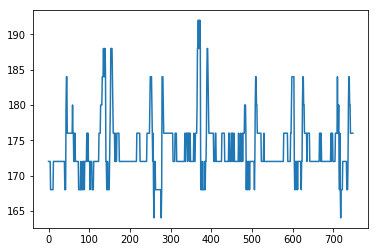

In [43]:
plt.plot(np.arange(len(nose_pos)), nose_pos[:,1])
plt.show()

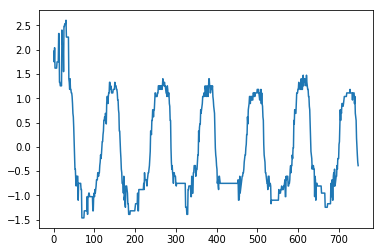

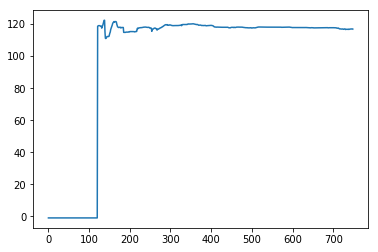

(2, 749)


In [4]:
keyps, keyps_stats = getKeypointStats("../outputs_npy/shoulder_press.npy", part_names)
# for i in keypoints_needed:
#     print(i+": "+str(keyps_stats_shoulder[i]))

right_data = keyps[:,4,:][:,1]
plotData(right_data)
plotMovingPeriodUsingAC(right_data)
r_startFound, r_endFound, r_startIdx, r_endIdx = processMovingPeriodicityAndGetEndPoints(right_data, 0, 8, 10)
left_data = keyps[:,7,:][:,1]
l_startFound, l_endFound, l_startIdx, l_endIdx = processMovingPeriodicityAndGetEndPoints(left_data, 0, 8, 10)
if (l_startFound == True or r_startFound == True) and (l_endFound == True or r_endFound == True):
    startIdx = min(l_startIdx, r_startIdx)
    endIdx = max(r_endIdx, l_endIdx)
    
print(startIdx, endIdx)

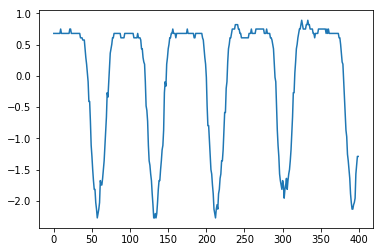

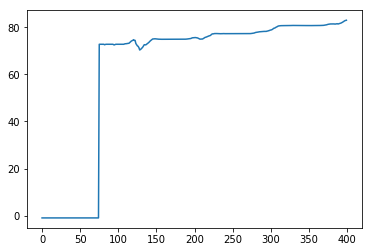

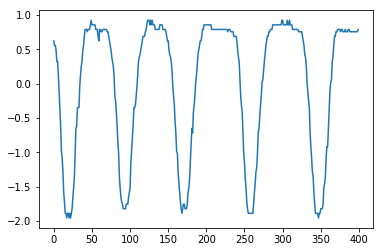

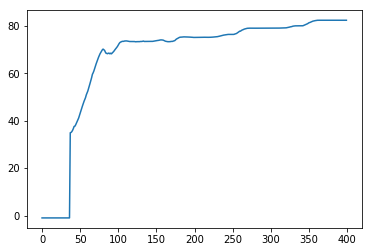

(2, 400)


In [73]:
keyps, keyps_stats = getKeypointStats("../outputs_npy/bicep_curls_4.npy", part_names)
# for i in keypoints_needed:
#     print(i+": "+str(keyps_stats_shoulder[i]))

right_data = keyps[:,4,:][:,1]
plotData(right_data)
plotMovingPeriodUsingAC(right_data)
r_startFound, r_endFound, r_startIdx, r_endIdx = processMovingPeriodicityAndGetEndPoints(right_data, 0, 8, 10)
left_data = keyps[:,7,:][:,1]
l_startFound, l_endFound, l_startIdx, l_endIdx = processMovingPeriodicityAndGetEndPoints(left_data, 0, 8, 10)
# if (l_startFound == True or r_startFound == True) and (l_endFound == True or r_endFound == True):
#     startIdx = min(l_startIdx, r_startIdx)
#     endIdx = max(r_endIdx, l_endIdx)
if (r_endIdx - r_startIdx) > (l_endIdx - l_startIdx):
    startIdx = r_startIdx
    endIdx = r_endFound
else:
    startIdx = l_startIdx
    endIdx = l_endIdx
plotData(left_data)
plotMovingPeriodUsingAC(left_data)
    
print(startIdx, endIdx)

In [11]:
keyps_stats

{'lankle': [0.0, 3.4403700435785343, 1, 51],
 'lear': [0.0, 5.043858955685344, 1, 22],
 'lelbow': [0.0, 3.7503769729494425, 3, 135],
 'leye': [0.0, 1.0796739698848854, 1, 40],
 'lhip': [0.0, 3.65902162303063, 1, 43],
 'lknee': [0.0, 3.671024004852713, 1, 41],
 'lshoulder': [0.0, 1.2824325297738584, 2, 134],
 'lwrist': [0.0, 3.564731042973531, 2, 46],
 'neck': [0.0, 1.6983192882911378, 1, 48],
 'nose': [0.0, 0.991190042560697, 1, 33],
 'rankle': [0.0, 3.834934944486664, 1, 39],
 'rear': [0.0, 1.247558833268774, 1, 26],
 'relbow': [0.0, 3.0641665905931, 2, 26],
 'reye': [0.0, 1.4295238659657792, 1, 206],
 'rhip': [0.0, 3.5648915682181594, 3, 42],
 'rknee': [0.0, 3.963209766092152, 1, 51],
 'rshoulder': [0.0, 2.624922292747735, 1, 46],
 'rwrist': [0.0, 2.9540675004287116, 1, 113]}

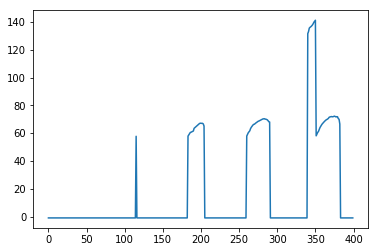

In [17]:
# plt.plot(np.arange(len(right_data)), right_data)
ma = []
for i in range(len(right_data)):
    ma.append(getPeriodUsingAutocorr(right_data[:i]))
plt.plot(np.arange(len(ma)), ma)

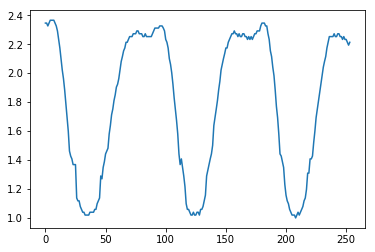

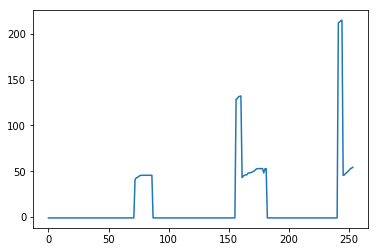

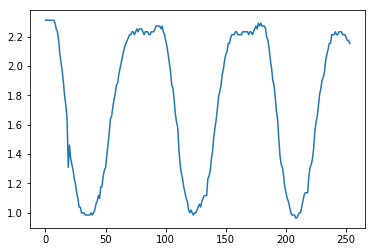

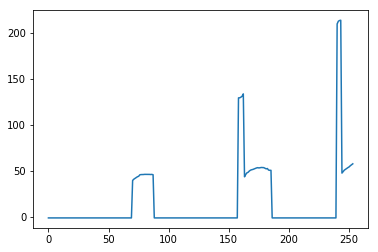

(30, 88)


In [4]:
keyps = getKeypointStats("../outputs_npy/front_raise_2.npy", part_names)
# for i in keypoints_needed:
#     print(i+": "+str(keyps_stats_shoulder[i]))

ps = load_ps("../outputs_npy/front_raise_2.npy")
poses = ps.poses
keyps_2 = keypointsExtraction(poses, part_names)
right_data = keyps[:,4,:][:,1]
plotData(right_data)
plotMovingPeriodUsingAC(right_data)
r_startFound, r_endFound, r_startIdx, r_endIdx = processMovingPeriodicityAndGetEndPoints(right_data, 0, 8, 10)
left_data = keyps[:,7,:][:,1]
l_startFound, l_endFound, l_startIdx, l_endIdx = processMovingPeriodicityAndGetEndPoints(left_data, 0, 8, 10)
# if (l_startFound == True or r_startFound == True) and (l_endFound == True or r_endFound == True):
#     startIdx = min(l_startIdx, r_startIdx)
#     endIdx = max(r_endIdx, l_endIdx)
if (r_endIdx - r_startIdx) > (l_endIdx - l_startIdx):
    startIdx = r_startIdx
    endIdx = r_endIdx
else:
    startIdx = l_startIdx
    endIdx = l_endIdx
plotData(left_data)
plotMovingPeriodUsingAC(left_data)
    
print(startIdx, endIdx)

# Miscellaneous

In [ ]:
# Identification of the exercise:

# There are 4 exercises 
# Bicep curls: shoulder, legs, elbow needs to be constant
# front raises: shoulder, legs needs to be constant, and max wrist, elbow level should be close to shoulder height
# shouler press: shoulder, legs needs to be constant, and max wrist level should be above eye level
# shoulder shrugs: shoulder should be moving

In [104]:
def are_legs_constant(keyps, part_names):
    lankle = keyps[:,part_names.index('lankle'),:][:,1]
    rankle = keyps[:,part_names.index('rankle'),:][:,1]
    if float((np.abs(np.diff(rankle)) < 1).sum())/len(rankle) > 0.9 or float((np.abs(np.diff(lankle)) < 1).sum())/len(lankle) > 0.9:
        return True
    return False

def are_shoulders_constant(keyps, part_names):
    lshoulder = keyps[:,part_names.index('lshoulder'),:][:,1]
    rshoulder = keyps[:,part_names.index('rshoulder'),:][:,1]
    if float((np.abs(np.diff(lshoulder)) < 1).sum())/len(lshoulder) > 0.9 or float((np.abs(np.diff(rshoulder)) < 1).sum())/len(rshoulder) > 0.9:
        return True
    return False

def are_elbows_constant(keyps, part_names):
    lelbow = keyps[:,part_names.index('lelbow'),:][:,1]
    relbow = keyps[:,part_names.index('relbow'),:][:,1]
    if float((np.abs(np.diff(lelbow)) < 1).sum())/len(lelbow) > 0.9 or float((np.abs(np.diff(relbow)) < 1).sum())/len(relbow) > 0.9:
        return True
    return False

In [136]:
bc1, keyps_stats = getKeypointStats("../outputs_npy/bicep_curls_4.npy", part_names)
bc2, keyps_stats = getKeypointStats("../outputs_npy/bicep_curls_6.npy", part_names)
bc3, keyps_stats = getKeypointStats("../outputs_npy/bicep_curls_7.npy", part_names)
mp1, _ = getKeypointStats("../outputs_npy/multiple_people_1.npy", part_names)

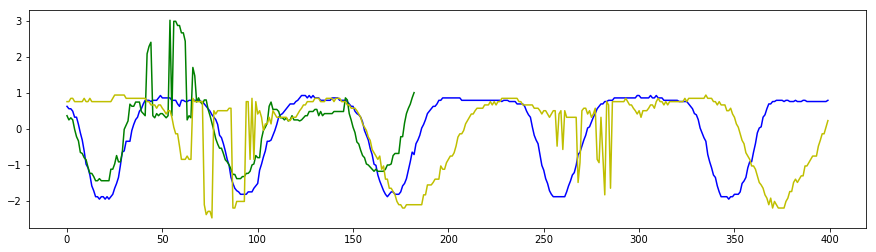

In [122]:
lwrist1 = bc1[:,part_names.index('lwrist'),:][:,1]
lwrist2 = bc2[:,part_names.index('lwrist'),:][:,1]
lwrist3 = bc3[:,part_names.index('lwrist'),:][:,1]
plt.figure(figsize=(15,4))
plt.plot(np.arange(len(lwrist)), lwrist1, 'b')
plt.plot(np.arange(len(lwrist2)), lwrist2, 'g')
plt.plot(np.arange(len(lwrist3)), lwrist3, 'y')
plt.show()

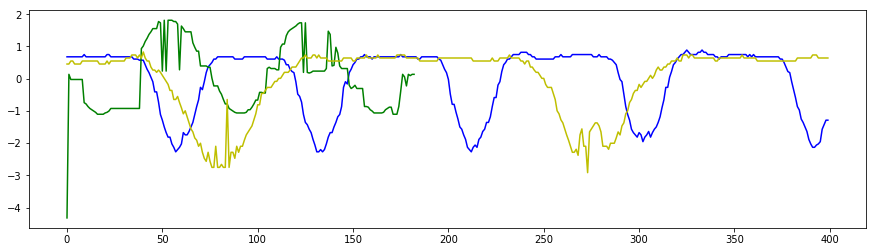

In [116]:
rwrist1 = bc1[:,part_names.index('rwrist'),:][:,1]
rwrist2 = bc2[:,part_names.index('rwrist'),:][:,1]
rwrist3 = bc3[:,part_names.index('rwrist'),:][:,1]
plt.figure(figsize=(15,4))
plt.plot(np.arange(len(lwrist)), rwrist1, 'b')
plt.plot(np.arange(len(lwrist2)), rwrist2, 'g')
plt.plot(np.arange(len(lwrist3)), rwrist3, 'y')
plt.show()

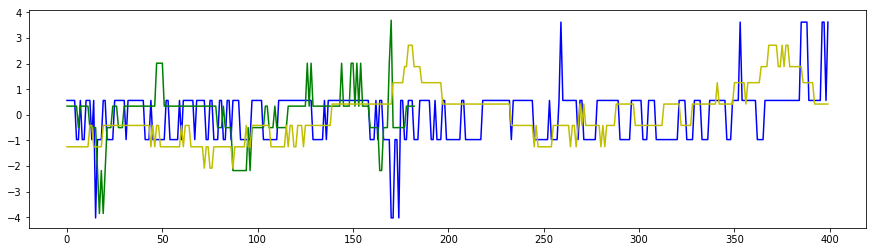

In [124]:
lwrist1 = bc1[:,part_names.index('lshoulder'),:][:,1]
lwrist2 = bc2[:,part_names.index('lshoulder'),:][:,1]
lwrist3 = bc3[:,part_names.index('lshoulder'),:][:,1]
plt.figure(figsize=(15,4))
plt.plot(np.arange(len(lwrist)), lwrist1, 'b')
plt.plot(np.arange(len(lwrist2)), lwrist2, 'g')
plt.plot(np.arange(len(lwrist3)), lwrist3, 'y')
plt.show()

In [135]:
def percentage_same(signal, threshold):
    diff = np.abs(np.diff(signal))
    cc = 0
    for i in diff:
        if i <= threshold:
            cc += 1
    return float(cc)/len(diff)

In [ ]:
def 